Получим фьючерсные цены на зерно

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [33]:
#read data from file
data = pd.read_csv("ittensive.time.series.01.csv", decimal=',')
data.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,Май '22,351.80,331.50,350.00,330.00,"0,01K","5,80%"
1,Апр. '22,332.50,302.00,332.50,300.00,"0,04K","8,13%"
2,Март '22,307.50,292.00,318.00,292.00,"0,81K","22,73%"
3,Февр. '22,250.55,216.05,216.05,216.05,-,"16,67%"
4,Янв. '22,214.75,219.75,219.75,219.75,-,"-2,50%"


In [34]:
#change index
data = data[::-1].reset_index()
data.head()

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,150,Нояб. '09,108.25,104.75,114.13,104.10,-,"3,34%"
1,149,Дек. '09,108.40,108.25,110.25,105.75,-,"0,14%"
2,148,Янв. '10,96.78,108.40,111.53,96.10,-,"-10,72%"
3,147,Февр. '10,97.13,97.03,101.13,91.43,-,"0,36%"
4,146,Март '10,98.88,97.13,100.38,91.78,-,"1,80%"


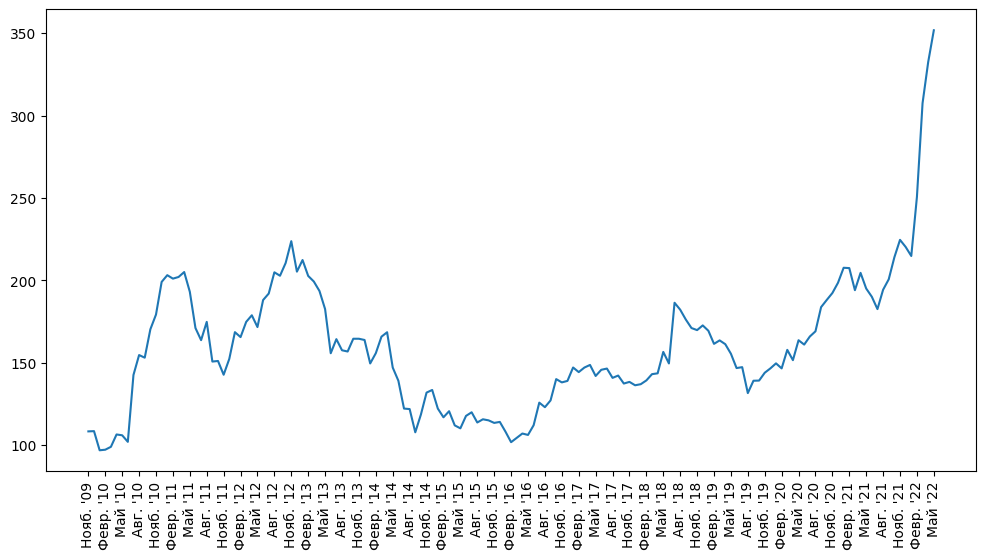

In [35]:
#draw curve
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values, data["Цена"].values)
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.show()

Приблизим фьючерсы на зерно с помощью полинома N-степени

In [36]:
degree = 5
x = data.index
y = data["Цена"]

In [37]:
x_ = PolynomialFeatures(degree).fit_transform(np.array(x).reshape(-1, 1))
model = LinearRegression().fit(x_, y)

In [38]:
model.predict(PolynomialFeatures(degree).fit_transform([[152]]))

array([323.75145613])

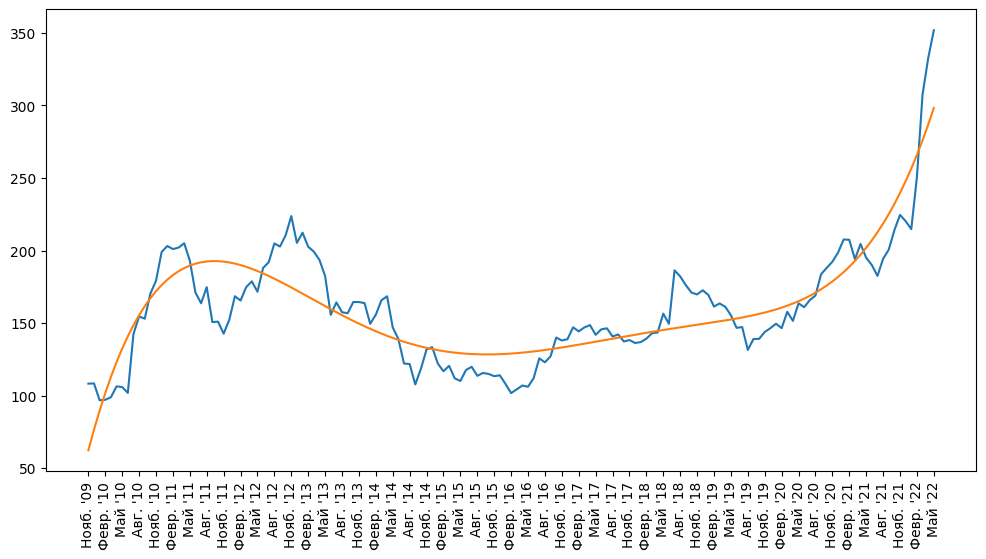

In [39]:
#draw curve
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values, data["Цена"].values)
plt.plot(model.predict(x_))
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.show()

Найдем наилучшую степень полинома при помощи AIC и вычислим среднеквадратичную ошибку

In [22]:
aic_min =10e10
for i in range(2, 10):
    x_ = PolynomialFeatures(i).fit_transform(np.array(x).reshape(-1, 1))
    m =OLS(y, add_constant(x_)).fit()
    if m.aic < aic_min:
        aic_min = m.aic
    else:
        i -= 1
        break

print("наилучшая модель степени", i)

наилучшая модель степени 6


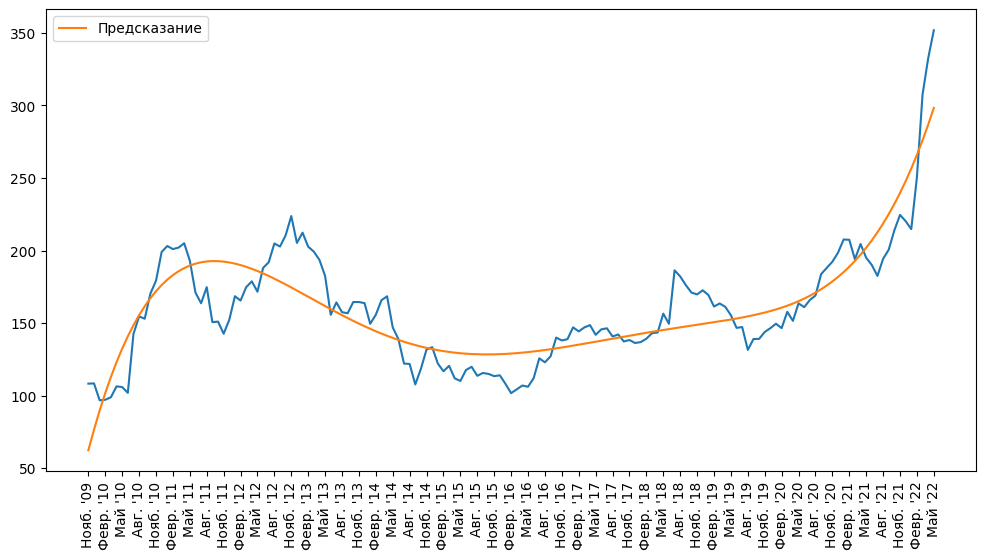

In [40]:
#draw curve
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values, data["Цена"].values)
plt.plot(model.predict(x_), label="Предсказание")
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.legend()
plt.show()

In [42]:
data["Предсказание"] = model.predict(x_)

In [43]:
print("MSE", round((data.apply(lambda row: (row['Цена'] - row['Предсказание'])**2, axis=1).sum()/len(data))**(0.5),2))

MSE 20.15
